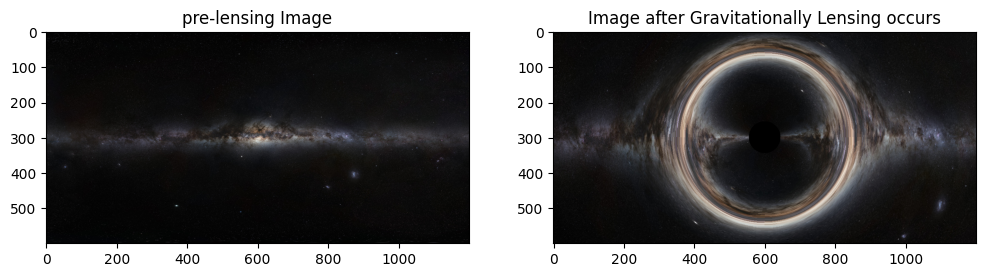

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img_path = "/Users/perfectoid/Downloads/milkyway-2.jpg" 
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#defining the dimension of the image
H, W, _ = img.shape

# parametrizing the black hole
M = W // 10.0  # the "mass" of the black hole affects lensing strength
X, Y = W // 2, H // 2  # Position of the black hole

# Creating an empty lensed image
img2 = np.zeros_like(img)

def lensing_func(x1, y1, M):
    """Apply gravitational lensing effect based on Schwarzschild metric."""
    dx1 = x1 - X
    dy1 = y1 - Y
    r = np.sqrt(dx1**2 + dy1**2) + 1e-6  # we are adding a small value to avoid division by zero

    # A corrected Einstein deflection angle
    alpha = (2 * M) / r  

    # moving pixels based on the deflection
    x2 = int(X + dx1 * (1 - alpha))
    y2 = int(Y + dy1 * (1 - alpha))

    # make sure that the new position of the pixels are within bounds
    x2 = np.clip(x2, 0, W - 1)
    y2 = np.clip(y2, 0, H - 1)

    return x2, y2

# Apply lensing effect to all pixels using NumPy for speed
for y1 in range(H):
    for x1 in range(W):
        x2, y2 = lensing_func(x1, y1, M)
        img2[y1, x1] = img[y2, x2]

# creating a black hole
R = int(M * 0.375)#where R is the radius of the black hole
for y1 in range(H):
    for x1 in range(W):
        if np.sqrt((x1 - X) ** 2 + (y1 - Y) ** 2) < R:
            img2[y1, x1] = [0, 0, 0]  # Make it black

# Displaying the result
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img)
ax[0].set_title("pre-lensing Image")
ax[1].imshow(img2)
ax[1].set_title("Image after Gravitationally Lensing occurs")
plt.show()


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the image
image_path = "/Users/perfectoid/Downloads/milkyway-2.jpg"
galaxy = cv2.imread(image_path)
galaxy = cv2.cvtColor(galaxy, cv2.COLOR_BGR2RGB)

# Image size
H, W, _ = galaxy.shape

# Define Black Hole Parameters
M = W // 10.0  # Black hole mass (affects the bending strength)
xx=[]
yy=[]
for i in range(0,6000,1):
    center_x, center_y = W //1.01-i, H // 2  # Black hole location
    
    # Create a coordinate grid
    X, Y = np.meshgrid(np.arange(W), np.arange(H))
    dx = X - center_x
    dy = Y - center_y
    r = np.sqrt(dx**2 + dy**2) + 1e-6  # Avoid division by zero
    
    # Compute lensing effect
    alpha = (2 * M) / r  # Deflection angle
    new_X = np.clip(center_x + dx * (1 - alpha), 0, W - 1).astype(int)
    new_Y = np.clip(center_y + dy * (1 - alpha), 0, H - 1).astype(int)
    
    # Apply lensing effect using NumPy indexing
    lensed_image = galaxy[new_Y, new_X]
    
    # Create a black hole (event horizon)
    black_hole_radius = int(M * 0.375)
    mask = r < black_hole_radius
    lensed_image[mask] = [0, 0, 0]  # Black hole center
    
    # -------------------------
    # Pixel Tracking Code
    # -------------------------
    # Choose a pixel to track (e.g., bright star at a known position)
    track_x, track_y = W // 2-20, H // 2-20  # Example position to track
    new_track_x, new_track_y = new_X[track_y, track_x], new_Y[track_y, track_x]
    xx.append(new_track_x)
    yy.append(new_track_y)
    #print(new_track_x, new_track_y)
    # print(track_x, track_y)
    # Display the result
    # window_name = 'image'
    
    # # Using cv2.imshow() method
    # # Displaying the image
    # cv2.imshow(window_name, lensed_image)
    
    # # waits for user to press any key
    # # (this is necessary to avoid Python kernel form crashing)
    # filename = f'/Users/perfectoid/Downloads/fold3/savedImage_big-one{i}.jpg'
    # cv2.imwrite(filename, lensed_image)
    # # Plot the original and tracked pixel position
    # fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    
    # # Original image with tracked pixel
    # ax[0].imshow(galaxy)
    # ax[0].scatter(track_x, track_y, color='red', marker='x', s=100, label="Original Position")
    # ax[0].set_title("Original Galaxy Image")
    # ax[0].legend()
    
    # # Lensed image with new position
    # ax[1].imshow(lensed_image)
    # ax[1].scatter(new_track_x, new_track_y, color='blue', marker='x', s=100, label="Lensed Position")
    # ax[1].set_title("Lensed Image with Tracked Pixel Shift")
    # ax[1].legend()
    
    # plt.show()


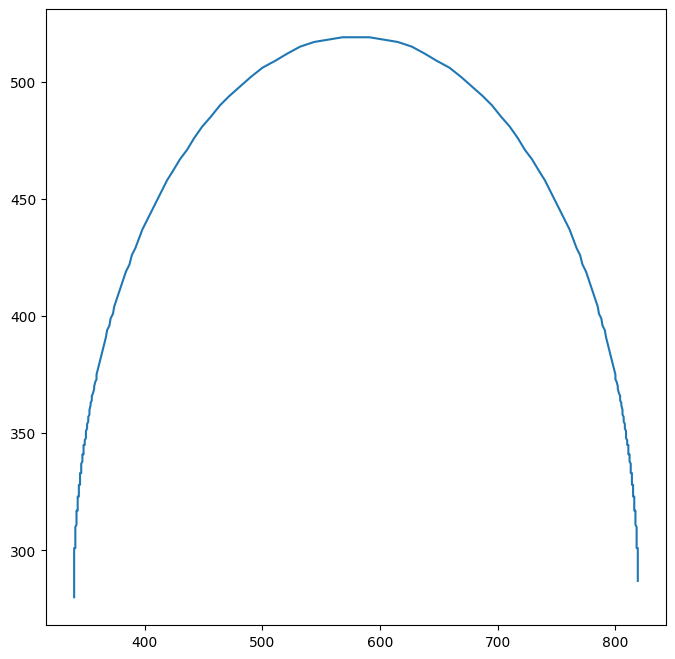

In [17]:
plt.figure(figsize=(8, 8))
plt.plot(xx,yy, label="Photon Path")